In [7]:
pip install matplotlib


  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Plotting label distributions for each split...


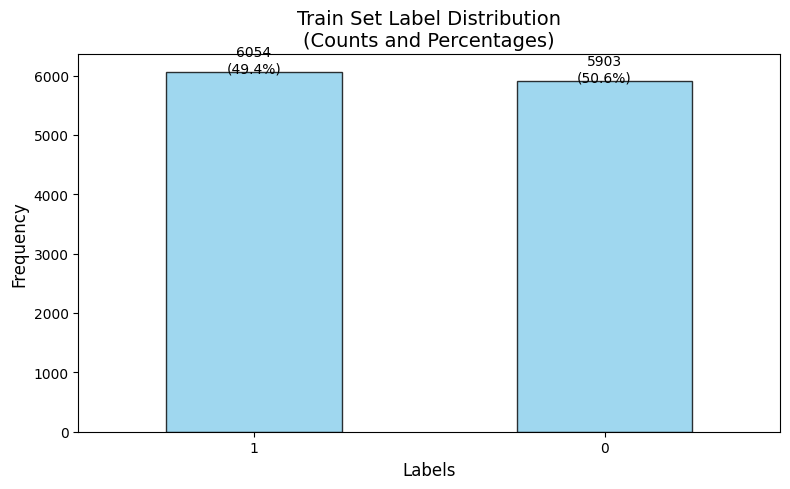

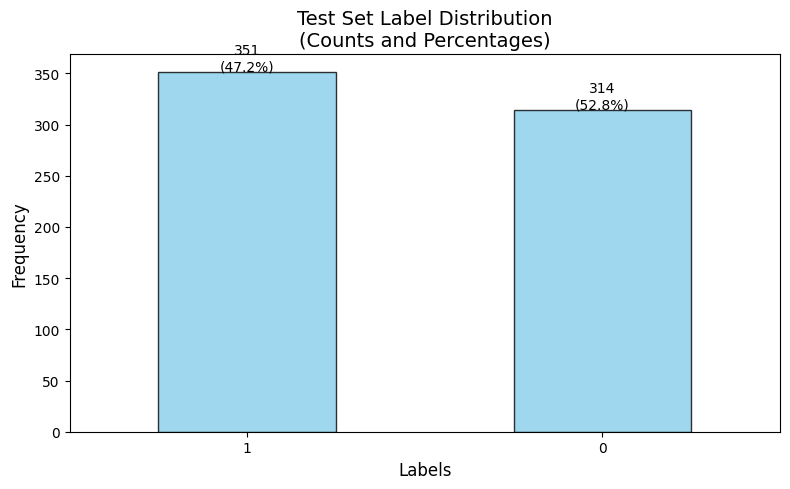

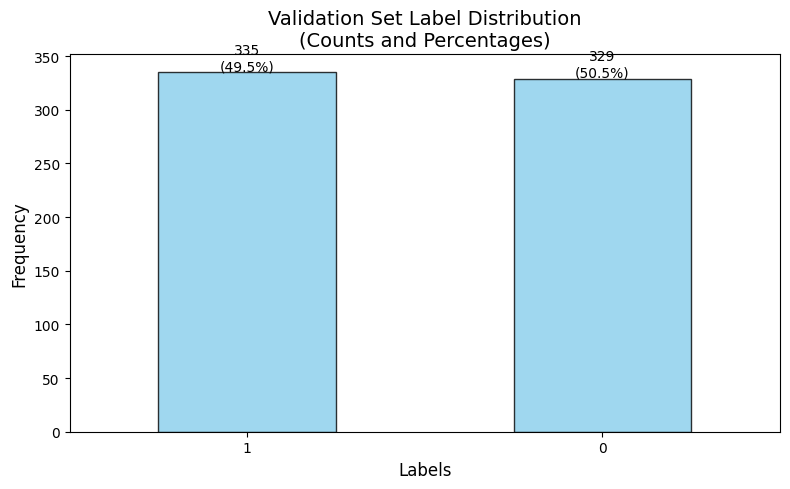

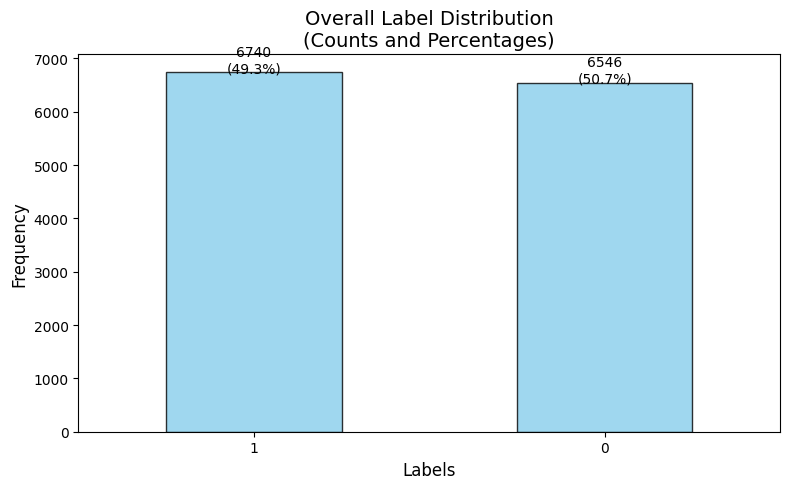

Plotting top words and sentence length distributions for each split...


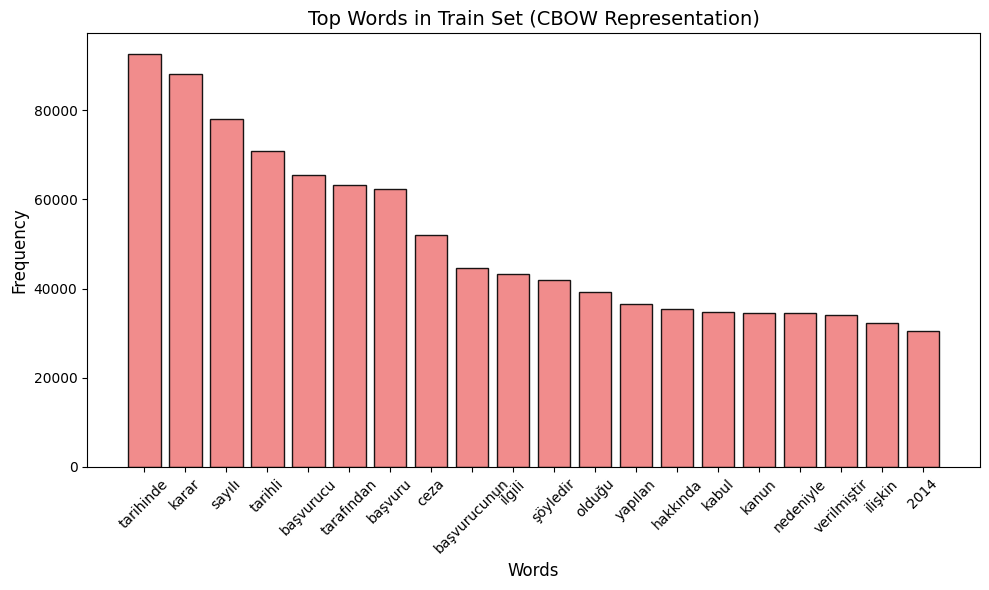

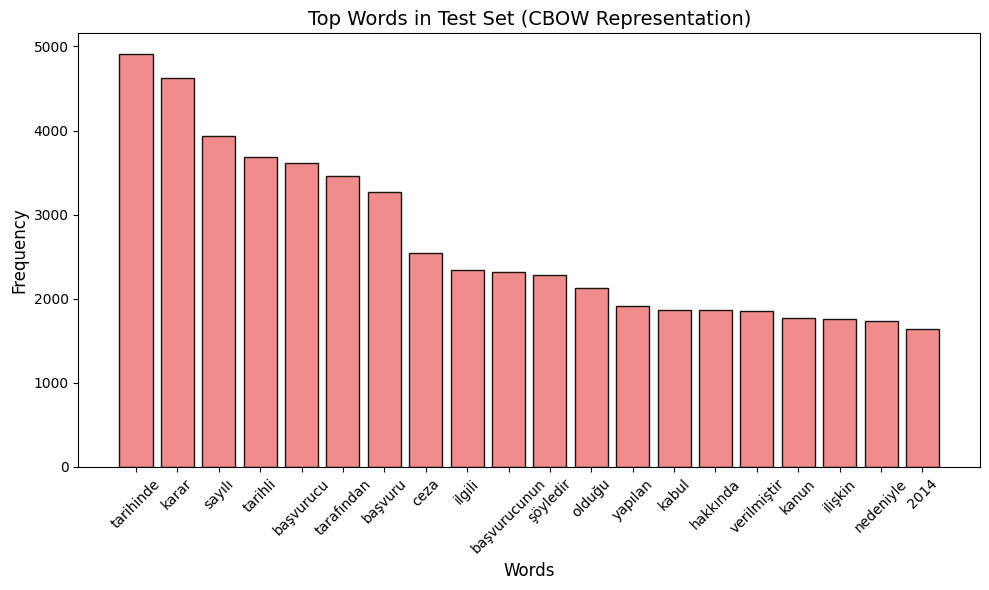

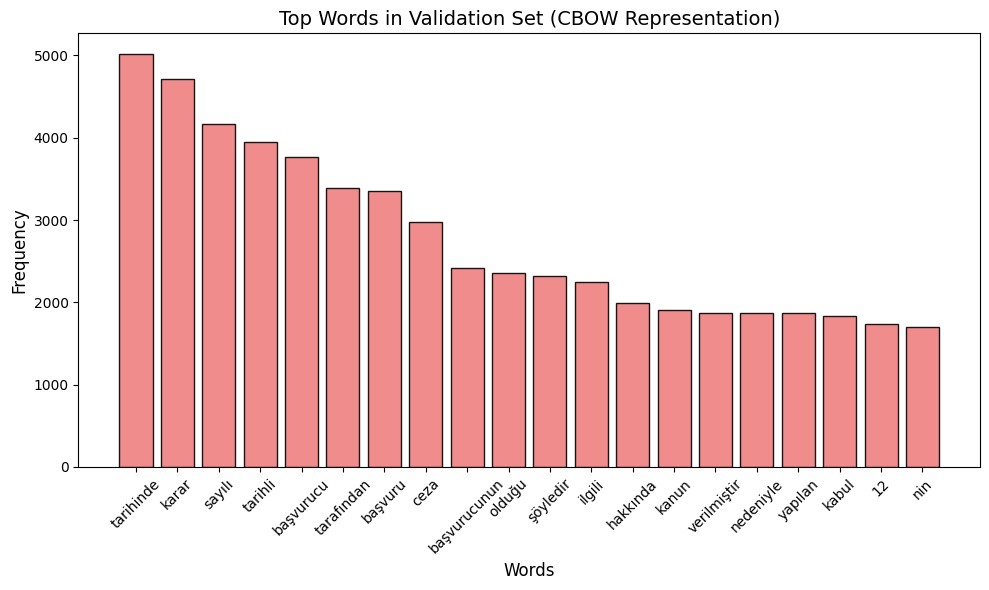

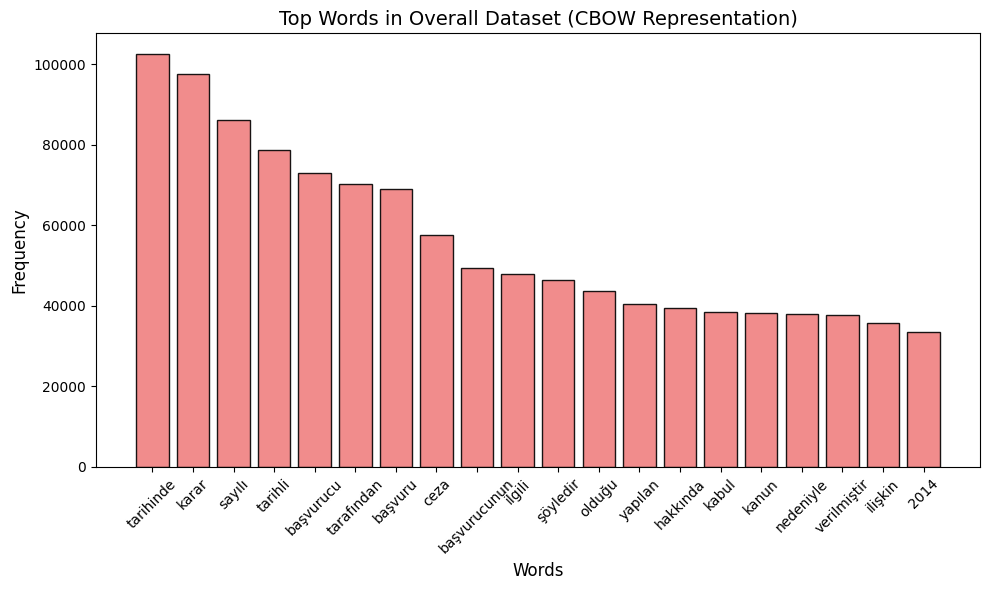

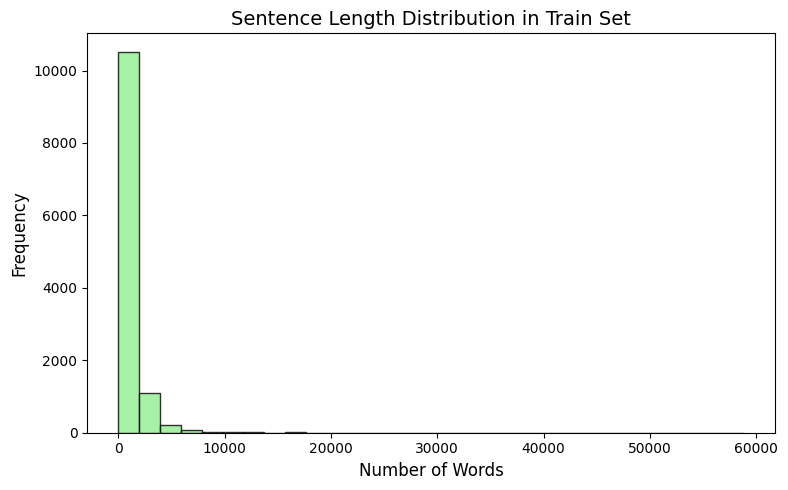

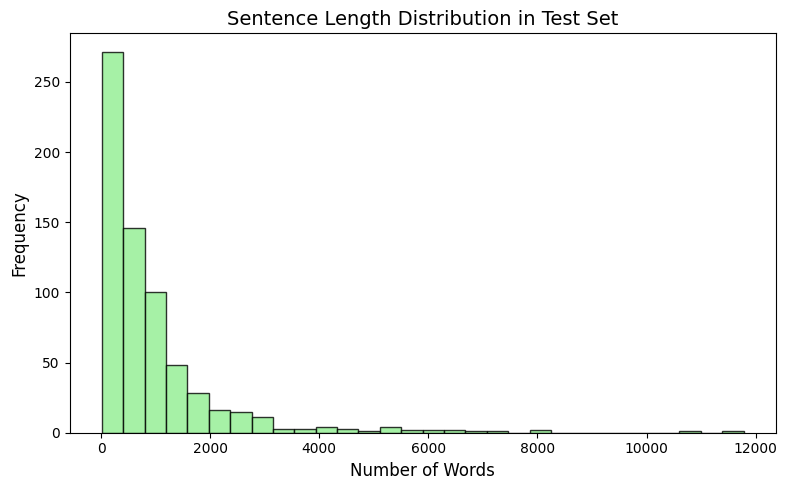

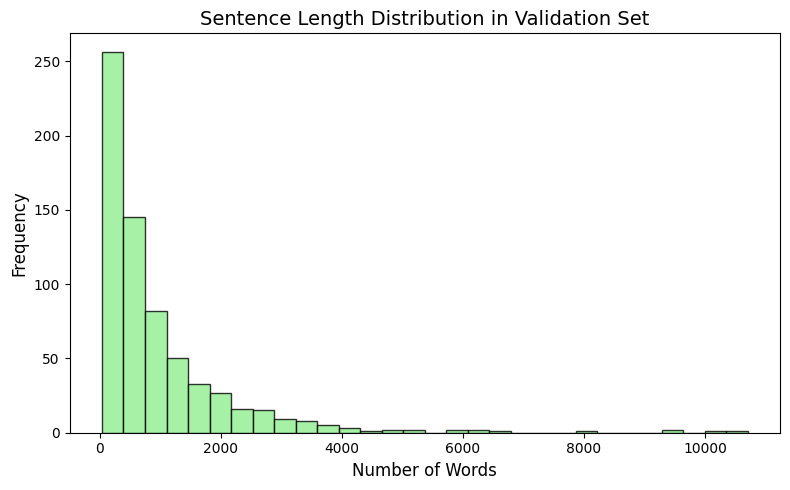

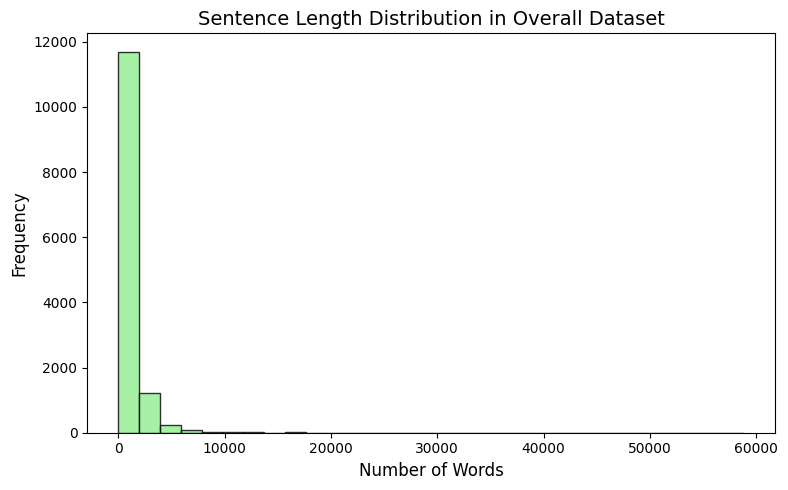

In [4]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Path to the folder containing JSON files
data_folder = "../Dataset/json"

# File paths
train_file = os.path.join(data_folder, "train.json")
test_file = os.path.join(data_folder, "test.json")
dev_file = os.path.join(data_folder, "dev.json")

# Function to load JSON files and convert to a DataFrame
def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

# Load data
train_df = load_json_to_dataframe(train_file)
test_df = load_json_to_dataframe(test_file)
dev_df = load_json_to_dataframe(dev_file)

# Function to plot label distribution
def plot_label_distribution(df, title):
    label_counts = df['labels'].value_counts()
    label_percent = (label_counts / label_counts.sum()) * 100

    plt.figure(figsize=(8, 5))
    label_counts.plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
    plt.title(f'{title}\n(Counts and Percentages)', fontsize=14)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    for i, count in enumerate(label_counts):
        percentage = label_percent[i]
        plt.text(i, count + 2, f'{count}\n({percentage:.1f}%)', ha='center', fontsize=10)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# CBOW representation using CountVectorizer
def plot_top_words(df, title, num_words=20):
    turkish_stop_words = [
        "ve", "bir", "bu", "ile", "de", "da", "için", "ama", "çünkü", "ne", "veya",
        "çok", "birçok", "diğer", "şu", "ise", "ile", "gibi", "olarak", "daha", "hem", "her", "ve", "ya", "olan"
    ]

    vectorizer = CountVectorizer(max_features=1000, stop_words=turkish_stop_words)
    X = vectorizer.fit_transform(df['text'])
    word_counts = X.toarray().sum(axis=0)
    words = vectorizer.get_feature_names_out()

    top_words = pd.DataFrame({'word': words, 'count': word_counts}).nlargest(num_words, 'count')

    plt.figure(figsize=(10, 6))
    plt.bar(top_words['word'], top_words['count'], color='lightcoral', alpha=0.9, edgecolor='black')
    plt.title(f'Top Words in {title} (CBOW Representation)', fontsize=14)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

# Sentence length distribution
def plot_sentence_length_distribution(df, title):
    sentence_lengths = df['text'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(8, 5))
    plt.hist(sentence_lengths, bins=30, color='lightgreen', alpha=0.8, edgecolor='black')
    plt.title(f'Sentence Length Distribution in {title}', fontsize=14)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot label distributions
print("Plotting label distributions for each split...")
plot_label_distribution(train_df, 'Train Set Label Distribution')
plot_label_distribution(test_df, 'Test Set Label Distribution')
plot_label_distribution(dev_df, 'Validation Set Label Distribution')

# Combine data for aggregated analysis
combined_df = pd.concat([train_df, test_df, dev_df], ignore_index=True)
plot_label_distribution(combined_df, 'Overall Label Distribution')

# Plot CBOW and Sentence Length Distributions
print("Plotting top words and sentence length distributions for each split...")
plot_top_words(train_df, 'Train Set')
plot_top_words(test_df, 'Test Set')
plot_top_words(dev_df, 'Validation Set')
plot_top_words(combined_df, 'Overall Dataset')

plot_sentence_length_distribution(train_df, 'Train Set')
plot_sentence_length_distribution(test_df, 'Test Set')
plot_sentence_length_distribution(dev_df, 'Validation Set')
plot_sentence_length_distribution(combined_df, 'Overall Dataset')
